In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

<br>
<br>

#### 1. (붓꽃 데이터) 데이터 읽어들이기 

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [4]:
type(iris.target)

numpy.ndarray

In [3]:
type(x)

numpy.ndarray

<br>
<br>

#### 2. 비어있는 모델 객체 만들기

In [4]:
model = decomposition.PCA(n_components=1) 

<br>
<br>

#### 3. 모델 객체 학습시키기

In [5]:
model.fit(x)
x1 = model.transform(x) # 모델에 맞춰서 원래 데이터를 차원이동 시켜줍니다.

In [6]:
x1[:10]#,x1.shape

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ]])

<br>
<br>

#### 4. 모델 시각화 

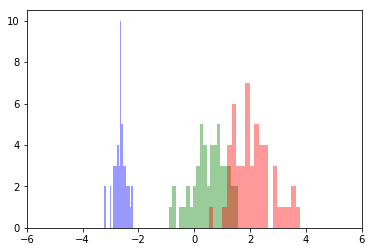

In [7]:
# pip install seaborn
import seaborn as sns

# bins : Specification of hist bins, or None to use Freedman-Diaconis rule.
# kde : Whether to plot a gaussian kernel density estimate
sns.distplot(x1[y==0], color="b", bins=20, kde=False)
sns.distplot(x1[y==1], color="g", bins=20, kde=False)
sns.distplot(x1[y==2], color="r", bins=20, kde=False)

plt.xlim(-6, 6)

plt.show()

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 객체 학습시키기

In [8]:
model = decomposition.PCA(n_components=3)
model.fit(x)
x = model.transform(x)

x

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

<br>
<br>

#### 4. 모델 시각화 

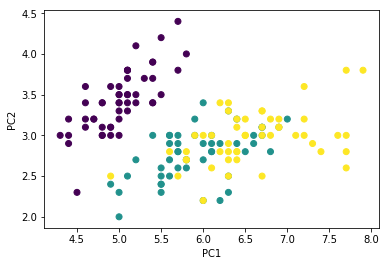

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# PCA plot of 2 PCs

plt.scatter(x[:, 0], x[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print(type(x[:,0]),type(iris.target))

In [7]:
print(x[:,0].shape,iris.target.shape)

(150,) (150,)


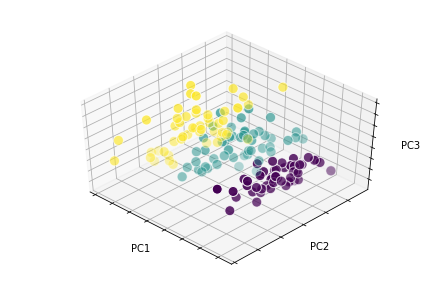

In [10]:
# PCA plot of 3 PCs

fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=iris.target, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐

plt.show()

#### (Extra) 5. 몇 개의 PC 면 충분할까?

In [11]:
# 각각의 새로운 축이 데이터셋의 분산(variance)을 얼마나 표현하는지 확인이 가능
# [PC1, PC2, PC3, ...]

# Hint: Explain variance
model.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [12]:
# 몇 개의 PC면 충분할까?
# np.argmax : 최대값의 인덱스를 리턴
# np.cumsum : 누적된 합계를 계산

np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95 ) + 1
# 95% 이상의 variance 를 설명하기 위한 축의 갯수를 확인할 수 있음

2

In [13]:
# ex) Boston house dataset의 경우,

boston = datasets.load_boston()
x = boston.data
y = boston.target

In [14]:
model = decomposition.PCA(n_components=10)
model.fit(x)
x = model.transform(x)

In [15]:
model.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05])

In [16]:
print(model.explained_variance_ratio_[0])

0.8058231751843905


In [17]:
np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95 ) + 1

2

In [18]:
# Better option (indicate the ratio of variance you wish to preserve)

iris = datasets.load_iris()
x = iris.data
y = iris.target

model = decomposition.PCA(n_components=0.95) # Explains 95% of total variance
model.fit(x)
x = model.transform(x)
x

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

**이상치, 결측치, outlier, 중요하지 않은 열 등이 존재할 때, principle component analysis를 통해 중요한 axis를 뽑아낼 수 있다.**